## We used [HOMER](http://homer.ucsd.edu/homer/) for TF enrichment analysis. 
HOMER wants the inputs as follows:

BED files should have at minimum 6 columns (separated by TABs, additional columns will be ignored)

    Column1: chromosome
    Column2: starting position
    Column3: ending position
    Column4: Unique Peak ID
    Column5: not used
    Column6: Strand (+/- or 0/1, where 0="+", 1="-"

### this is the format we have:

In [70]:
flow_cont_VS_stat_cont = read.table("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/flow_cont_VS_stat_cont_TSS_annotated_geneSymbol.bed", sep = "\t", header = F)
head(flow_cont_VS_stat_cont)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,923802,924203,SAMD11,-0.6917031,0.0029030722,0.022116163,7.257583,6.718923,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
2,chr1,930611,931012,SAMD11,0.8497081,0.0025110344,0.019965822,5.786526,6.259011,5.079313,chr1,923926,923927,ENSG00000187634.11,0,+,6685
3,chr1,938076,938477,SAMD11,-0.6237558,0.0019482280,0.016588904,7.528921,7.096159,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
4,chr1,973718,974119,PLEKHN1,0.8809586,0.0031662308,0.023530886,5.848033,6.395402,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223
5,chr1,1032933,1033334,AGRN,-0.7445450,0.0003155041,0.004143038,8.212570,7.683965,8.598580,chr1,1020121,1020122,ENSG00000188157.14,0,+,12812
6,chr1,1040639,1041040,AGRN,-0.6362453,0.0046353932,0.030801001,8.702365,8.253828,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518


### column names: 
c("seqnames","start","end","gene_symbol","fold_change","p_value","FDR","Conc","Conc_flow_cont","Conc_stat_cont", "ENS_seqnames", ,"ENS_start","ENS_end", "ENS_ID", "ENS_width", "ENS_strand","ENS_sth")

In [71]:
uniq_peak_ID =  paste(flow_cont_VS_stat_cont$V1,flow_cont_VS_stat_cont$V2,flow_cont_VS_stat_cont$V3,flow_cont_VS_stat_cont$V4, sep="_")

In [72]:
head(uniq_peak_ID)

[1] "chr1_923802_924203_SAMD11"  "chr1_930611_931012_SAMD11" 
[3] "chr1_938076_938477_SAMD11"  "chr1_973718_974119_PLEKHN1"
[5] "chr1_1032933_1033334_AGRN"  "chr1_1040639_1041040_AGRN"

In [73]:
homer_out = data.frame(chr=flow_cont_VS_stat_cont$V1,
                       start=flow_cont_VS_stat_cont$V2,
                       end=flow_cont_VS_stat_cont$V3,
                       unique_peak_ID=uniq_peak_ID,
                       genes=flow_cont_VS_stat_cont$V4,
                       strand = rep("*",NROW(flow_cont_VS_stat_cont))
                      )

In [74]:
head(homer_out)

,chr,start,end,unique_peak_ID,genes,strand
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1,923802,924203,chr1_923802_924203_SAMD11,SAMD11,*
2,chr1,930611,931012,chr1_930611_931012_SAMD11,SAMD11,*
3,chr1,938076,938477,chr1_938076_938477_SAMD11,SAMD11,*
4,chr1,973718,974119,chr1_973718_974119_PLEKHN1,PLEKHN1,*
5,chr1,1032933,1033334,chr1_1032933_1033334_AGRN,AGRN,*
6,chr1,1040639,1041040,chr1_1040639_1041040_AGRN,AGRN,*


In [75]:
write.table(homer_out, file="/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/flow_cont_VS_stat_cont_homer.bed", quote=F, sep="\t", row.names=F, col.names=F)

## Which of the differential regions are annotated with the same gene BUT not exactly the same regions? : B


## this function takes the bed file and converts it to HOMER-happy format:

In [76]:
bed_to_homer_input <- function(file_path){
    file_read_in = read.table(file_path, sep = "\t", header = F)
    uniq_peak_ID =  paste(file_read_in$V1,file_read_in$V2,file_read_in$V3,file_read_in$V4, sep="_")
    homer_out = data.frame(chr=file_read_in$V1,
                       start=file_read_in$V2,
                       end=file_read_in$V3,
                       unique_peak_ID=uniq_peak_ID,
                       genes=file_read_in$V4,
                       strand = rep("*",NROW(file_read_in))
                      )
    return(homer_out)

}

In [77]:
stat_bmp9_VS_stat_cont_path = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/stat_bmp9_VS_stat_cont_TSS_annotated_geneSymbol.bed"
stat_bmp9_VS_stat_cont_homer_out = bed_to_homer_input(stat_bmp9_VS_stat_cont_path)

In [78]:
head(stat_bmp9_VS_stat_cont_homer_out)

,chr,start,end,unique_peak_ID,genes,strand
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1,910190,910591,chr1_910190_910591_SAMD11,SAMD11,*
2,chr1,921022,921423,chr1_921022_921423_SAMD11,SAMD11,*
3,chr1,923802,924203,chr1_923802_924203_SAMD11,SAMD11,*
4,chr1,925466,925867,chr1_925466_925867_SAMD11,SAMD11,*
5,chr1,941593,941994,chr1_941593_941994_NOC2L,NOC2L,*
6,chr1,942434,942835,chr1_942434_942835_NOC2L,NOC2L,*


In [79]:
write.table(stat_bmp9_VS_stat_cont_homer_out, file="/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/stat_bmp9_VS_stat_cont_homer.bed", quote=F, sep="\t", row.names=F, col.names=F)


In [80]:
# findMotifsGenome.pl HOMER_INPUT_BED/stat_bmp9_VS_stat_cont_homer.bed gencodev29 /project/Mechanogenomics/ATACseq_analysis/MotifEnrichment/stat_bmp9_VS_stat_cont_homer/ -size given





## only positively and only negatively differentally open regions

In [81]:
colnames(flow_cont_VS_stat_cont) = c("seqnames","start","end","gene_symbol","fold_change","p_value","FDR","Conc","Conc_flow_cont","Conc_stat_cont", "ENS_seqnames", "ENS_start","ENS_end", "ENS_ID", "ENS_width", "ENS_strand","ENS_sth")
head(flow_cont_VS_stat_cont)

,seqnames,start,end,gene_symbol,fold_change,p_value,FDR,Conc,Conc_flow_cont,Conc_stat_cont,ENS_seqnames,ENS_start,ENS_end,ENS_ID,ENS_width,ENS_strand,ENS_sth
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,923802,924203,SAMD11,-0.6917031,0.0029030722,0.022116163,7.257583,6.718923,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
2,chr1,930611,931012,SAMD11,0.8497081,0.0025110344,0.019965822,5.786526,6.259011,5.079313,chr1,923926,923927,ENSG00000187634.11,0,+,6685
3,chr1,938076,938477,SAMD11,-0.6237558,0.0019482280,0.016588904,7.528921,7.096159,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
4,chr1,973718,974119,PLEKHN1,0.8809586,0.0031662308,0.023530886,5.848033,6.395402,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223
5,chr1,1032933,1033334,AGRN,-0.7445450,0.0003155041,0.004143038,8.212570,7.683965,8.598580,chr1,1020121,1020122,ENSG00000188157.14,0,+,12812
6,chr1,1040639,1041040,AGRN,-0.6362453,0.0046353932,0.030801001,8.702365,8.253828,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518


## I will have 3 sets (all with FDR <0.05):
1. all the FCs
2. FC >0.5 & FC < - 0.5
3. FC > 1.5 & FC < - 1.5

### for flow

In [91]:
flow_cont_VS_stat_cont_FC_biger_0.5 = flow_cont_VS_stat_cont_FC_positive[flow_cont_VS_stat_cont_FC_positive$fold_change>0.5,]
flow_cont_VS_stat_cont_FC_biger_1.5 = flow_cont_VS_stat_cont_FC_positive[flow_cont_VS_stat_cont_FC_positive$fold_change>1.5,]
flow_cont_VS_stat_cont_FC_less_minus0.5 = flow_cont_VS_stat_cont_FC_negative[flow_cont_VS_stat_cont_FC_negative$fold_change< -0.5,]
flow_cont_VS_stat_cont_FC_less_minus1.5 = flow_cont_VS_stat_cont_FC_negative[flow_cont_VS_stat_cont_FC_negative$fold_change< -1.5,]

In [118]:
head(flow_cont_VS_stat_cont_FC_less_minus1.5)

,seqnames,start,end,gene_symbol,fold_change,p_value,FDR,Conc,Conc_flow_cont,Conc_stat_cont,ENS_seqnames,ENS_start,ENS_end,ENS_ID,ENS_width,ENS_strand,ENS_sth
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
174,chr1,8821069,8821470,RERE,-2.133686,6.558389e-13,1.348207e-10,6.404201,4.728446,7.158659,chr1,8817643,8817644,ENSG00000142599.17,0,-,3426
186,chr1,9115810,9116211,GPR157,-1.512509,3.535844e-07,1.439159e-05,5.870173,4.679175,6.513567,chr1,9129170,9129171,ENSG00000180758.11,0,-,12960
198,chr1,9371595,9371996,SPSB1,-1.682693,1.648372e-18,1.242470e-15,8.670206,7.473896,9.315086,chr1,9292878,9292879,ENSG00000171621.13,0,+,78717
254,chr1,11842171,11842572,NPPA,-1.631844,1.749994e-10,1.891813e-08,6.981143,5.689524,7.651537,chr1,11848345,11848346,ENSG00000175206.10,0,-,5774
280,chr1,12595854,12596255,DHRS3,-1.555091,1.857139e-11,2.614573e-09,9.079829,7.908277,9.717723,chr1,12617731,12617732,ENSG00000162496.8,0,-,21477
415,chr1,20029636,20030037,PLA2G5,-1.634665,4.865032e-15,1.704650e-12,7.711817,6.585313,8.336597,chr1,20028177,20028178,ENSG00000127472.10,0,+,1459


### for bmp9

In [92]:
stat_bmp9_VS_stat_cont_path = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/stat_bmp9_VS_stat_cont_TSS_annotated_geneSymbol.bed"


In [93]:
stat_bmp9_VS_stat_cont = read.table(stat_bmp9_VS_stat_cont_path, sep = "\t", header = F)
colnames(stat_bmp9_VS_stat_cont) = c("seqnames","start","end","gene_symbol","fold_change","p_value","FDR","Conc","Conc_stat_bmp9","Conc_stat_cont", "ENS_seqnames", "ENS_start","ENS_end", "ENS_ID", "ENS_width", "ENS_strand","ENS_sth")
head(stat_bmp9_VS_stat_cont)

,seqnames,start,end,gene_symbol,fold_change,p_value,FDR,Conc,Conc_stat_bmp9,Conc_stat_cont,ENS_seqnames,ENS_start,ENS_end,ENS_ID,ENS_width,ENS_strand,ENS_sth
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,910190,910591,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336
2,chr1,921022,921423,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504
3,chr1,923802,924203,SAMD11,-1.1629176,2.520596e-07,2.974507e-05,7.101950,6.210326,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
4,chr1,925466,925867,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540
5,chr1,941593,941994,NOC2L,-0.6583104,1.240086e-03,1.926971e-02,6.970025,6.486176,7.331718,chr1,959309,959310,ENSG00000188976.10,0,-,17316
6,chr1,942434,942835,NOC2L,-0.8610278,4.864304e-05,1.897477e-03,6.774891,6.180369,7.194684,chr1,959309,959310,ENSG00000188976.10,0,-,16475


In [95]:
stat_bmp9_VS_stat_cont_FC_positive =  stat_bmp9_VS_stat_cont[stat_bmp9_VS_stat_cont$fold_change >0,]
stat_bmp9_VS_stat_cont_FC_negative =  stat_bmp9_VS_stat_cont[stat_bmp9_VS_stat_cont$fold_change <0,]
stat_bmp9_VS_stat_cont_FC_biger_0.5 = stat_bmp9_VS_stat_cont_FC_positive[stat_bmp9_VS_stat_cont_FC_positive$fold_change>0.5,]
stat_bmp9_VS_stat_cont_FC_biger_1.5 = stat_bmp9_VS_stat_cont_FC_positive[stat_bmp9_VS_stat_cont_FC_positive$fold_change>1.5,]
stat_bmp9_VS_stat_cont_FC_less_minus0.5 = stat_bmp9_VS_stat_cont_FC_negative[stat_bmp9_VS_stat_cont_FC_negative$fold_change< -0.5,]
stat_bmp9_VS_stat_cont_FC_less_minus1.5 = stat_bmp9_VS_stat_cont_FC_negative[stat_bmp9_VS_stat_cont_FC_negative$fold_change< -1.5,]

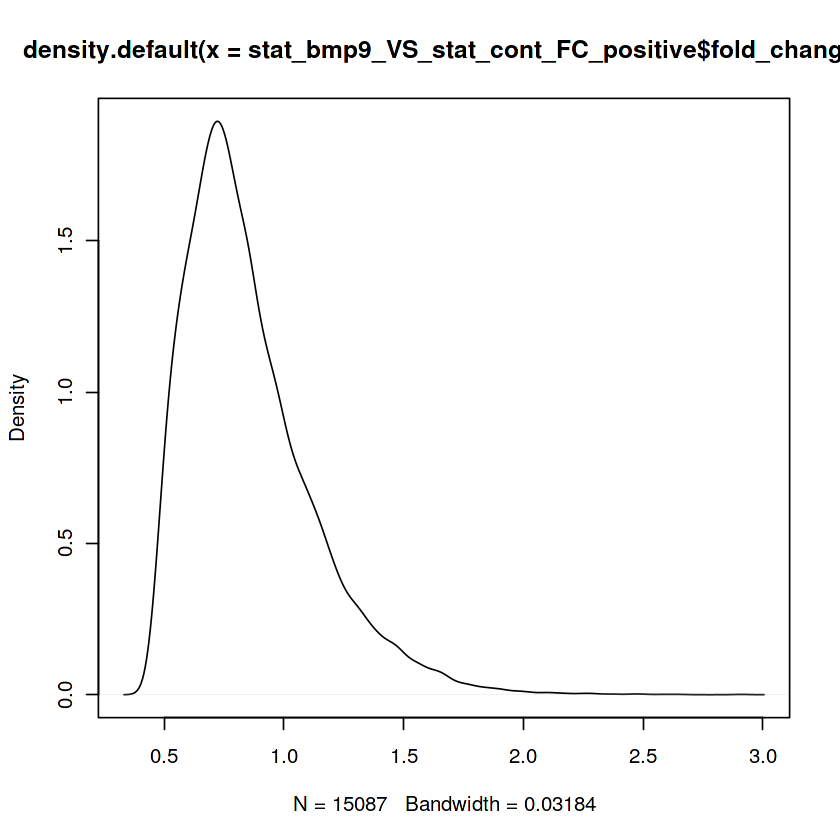

In [96]:
plot(density(stat_bmp9_VS_stat_cont_FC_positive$fold_change))

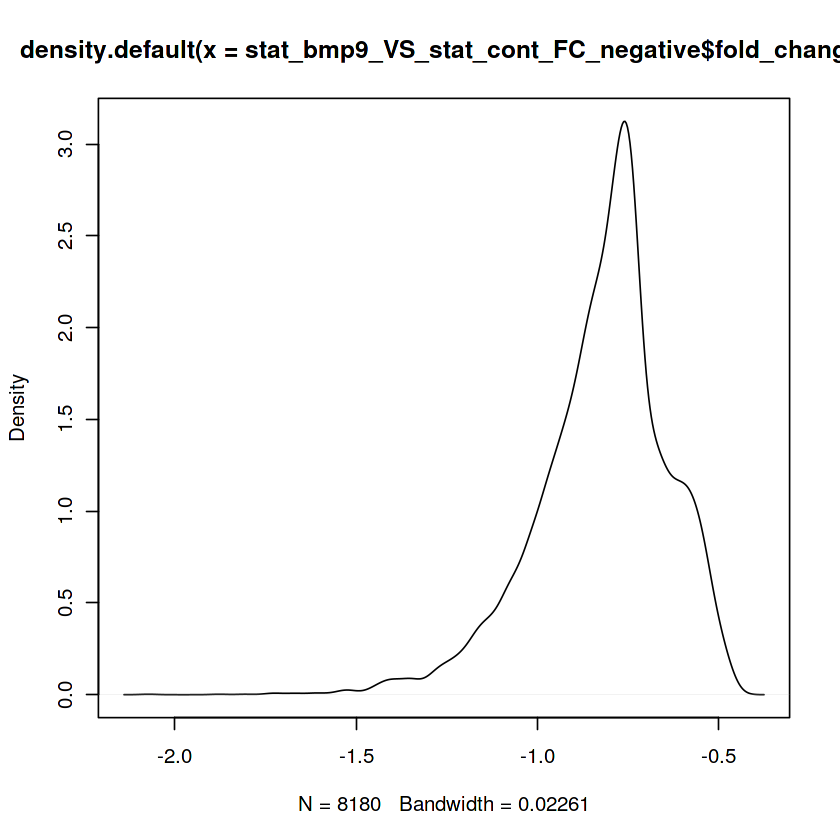

In [97]:
plot(density(stat_bmp9_VS_stat_cont_FC_negative$fold_change))

## common regions between BMP9 and BMP9+flow

In [55]:
common_regions_bmp9_and_bmp9PLUSflow_path = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2.csv"


In [60]:
common_regions_bmp9_and_bmp9PLUSflow = read.table(common_regions_bmp9_and_bmp9PLUSflow_path, sep = ",", header = T)

colnames(common_regions_bmp9_and_bmp9PLUSflow) = c('seqnames','start','end','width','strand','gene_symbol','fold_change','pvalue','FDR','Conc','Conc_stat_bmp9','Conc_stat_cont','TSS_seq','TSS_start','TSS_end','TSS_ENSEMBL','TSS_interval','TSS_strand','TSS_sth','regions')
head(common_regions_bmp9_and_bmp9PLUSflow)

,seqnames,start,end,width,strand,gene_symbol,fold_change,pvalue,FDR,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,1059451,1059852,402,*,RNF223,-0.7055841,2.585572e-04,0.0064703603,8.518745,8.027916,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456,chr1_1059451_1059852_RNF223
2,chr1,1079385,1079786,402,*,RNF223,-0.8755083,1.387927e-05,0.0007236323,8.557989,7.947661,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078,chr1_1079385_1079786_RNF223
3,chr1,1179347,1179748,402,*,TTLL10,-0.9529298,6.042480e-04,0.0117535644,4.336342,3.445011,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465,chr1_1179347_1179748_TTLL10
4,chr1,1212809,1213210,402,*,TNFRSF4,-0.6039477,5.082381e-04,0.0104108207,7.774293,7.371895,8.088585,chr1,1214138,1214139,ENSG00000186827.10,0,-,929,chr1_1212809_1213210_TNFRSF4
5,chr1,1243376,1243777,402,*,C1QTNF12,-1.0235891,1.188662e-04,0.0036659826,4.931899,4.031153,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946,chr1_1243376_1243777_C1QTNF12
6,chr1,1925619,1926020,402,*,TMEM52,-0.7384102,3.147106e-03,0.0356983378,5.350021,4.739462,5.777688,chr1,1919273,1919274,ENSG00000178821.12,0,-,6346,chr1_1925619_1926020_TMEM52


In [61]:
common_regions_bmp9_and_bmp9PLUSflow[common_regions_bmp9_and_bmp9PLUSflow$fold_change< -1.5,]

,seqnames,start,end,width,strand,gene_symbol,fold_change,pvalue,FDR,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
2175,chr15,20341865,20342266,402,*,GOLGA6L6,-1.522909,5.686727e-10,2.061725e-07,6.196551,5.029494,6.833160,chr15,20541800,20541801,ENSG00000277322.1,0,-,199535,chr15_20341865_20342266_GOLGA6L6
3558,chr2,217161355,217161756,402,*,TNP1,-1.721479,2.713531e-15,7.171013e-12,7.700397,6.368563,8.380935,chr2,216860064,216860065,ENSG00000118245.2,0,-,301291,chr2_217161355_217161756_TNP1
4050,chr3,49805366,49805767,402,*,INKA1,-1.667873,1.094503e-19,1.009678e-15,8.186701,6.984308,8.833275,chr3,49803252,49803253,ENSG00000185614.4,0,+,2114,chr3_49805366_49805767_INKA1
5452,chr6,13418820,13419221,402,*,GFOD1,-1.607369,5.149450e-10,1.905436e-07,6.516351,5.149547,7.205427,chr6,13487662,13487663,ENSG00000145990.10,0,-,68442,chr6_13418820_13419221_GFOD1
6881,chr9,136674441,136674842,402,*,AGPAT2,-2.072336,2.529052e-24,9.245498e-20,9.027036,7.456225,9.761155,chr9,136687423,136687424,ENSG00000169692.12,0,-,12582,chr9_136674441_136674842_AGPAT2
6882,chr9,136675765,136676166,402,*,AGPAT2,-1.877563,5.380651e-19,3.807123e-15,8.583317,7.185390,9.279779,chr9,136687423,136687424,ENSG00000169692.12,0,-,11258,chr9_136675765_136676166_AGPAT2


In [62]:
common_regions_bmp9_and_bmp9PLUSflow_positive =  common_regions_bmp9_and_bmp9PLUSflow[common_regions_bmp9_and_bmp9PLUSflow$fold_change >0,]
common_regions_bmp9_and_bmp9PLUSflow_negative =  common_regions_bmp9_and_bmp9PLUSflow[common_regions_bmp9_and_bmp9PLUSflow$fold_change <0,]
common_regions_bmp9_and_bmp9PLUSflow_FC_biger_0.5 = common_regions_bmp9_and_bmp9PLUSflow_positive[common_regions_bmp9_and_bmp9PLUSflow_positive$fold_change>0.5,]
common_regions_bmp9_and_bmp9PLUSflow_FC_biger_1.5 = common_regions_bmp9_and_bmp9PLUSflow_positive[common_regions_bmp9_and_bmp9PLUSflow_positive$fold_change>1.5,]
common_regions_bmp9_and_bmp9PLUSflow_FC_less_minus0.5 = common_regions_bmp9_and_bmp9PLUSflow_negative[common_regions_bmp9_and_bmp9PLUSflow_negative$fold_change< -0.5,]
common_regions_bmp9_and_bmp9PLUSflow_FC_less_minus1.5 = common_regions_bmp9_and_bmp9PLUSflow_negative[common_regions_bmp9_and_bmp9PLUSflow_negative$fold_change< -1.5,]

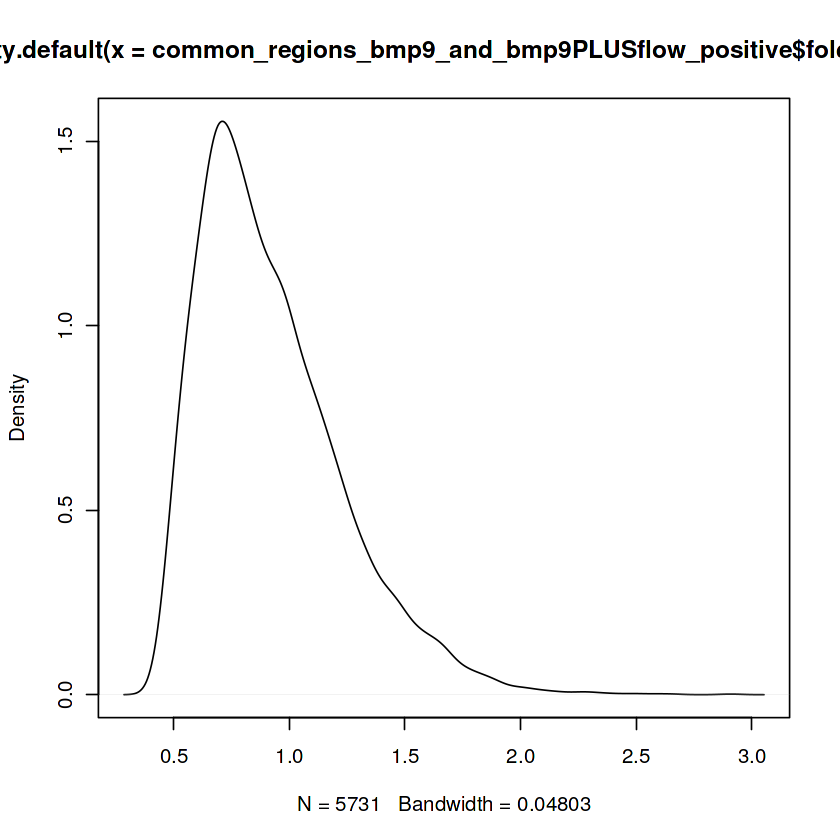

In [63]:
plot(density(common_regions_bmp9_and_bmp9PLUSflow_positive$fold_change))

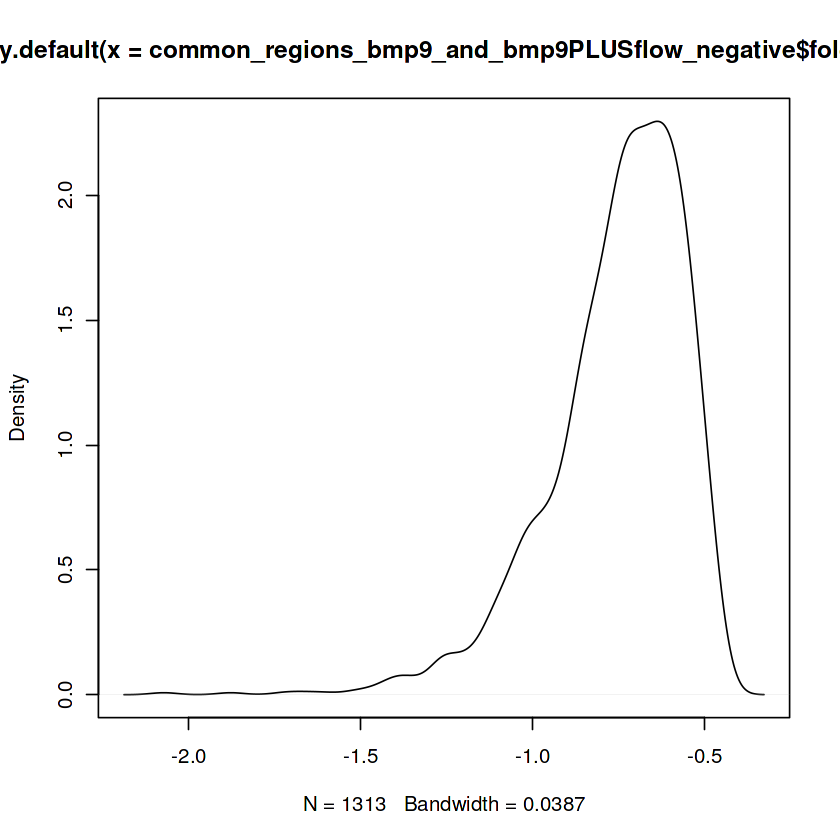

In [64]:
plot(density(common_regions_bmp9_and_bmp9PLUSflow_negative$fold_change))

#  only_BMP9_regions_from_all_comparisons

In [49]:
only_BMP9_regions_from_all_comparisons_path = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/only_BMP9_regions_from_all_comparisons_df2_annotated.csv"


In [50]:
only_BMP9_regions_from_all_comparisons = read.table(only_BMP9_regions_from_all_comparisons_path, sep = ",", header = T)
colnames(only_BMP9_regions_from_all_comparisons) = c('seqnames','start','end','width','strand','gene_symbol','fold_change','pvalue','FDR','Conc','Conc_stat_bmp9','Conc_stat_cont','TSS_seq','TSS_start','TSS_end','TSS_ENSEMBL','TSS_interval','TSS_strand','TSS_sth','regions'
)
head(only_BMP9_regions_from_all_comparisons)

,seqnames,start,end,width,strand,gene_symbol,fold_change,pvalue,FDR,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,910190,910591,402,*,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336,chr1_910190_910591_SAMD11
2,chr1,921022,921423,402,*,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504,chr1_921022_921423_SAMD11
3,chr1,925466,925867,402,*,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540,chr1_925466_925867_SAMD11
4,chr1,941593,941994,402,*,NOC2L,-0.6583104,1.240086e-03,1.926971e-02,6.970025,6.486176,7.331718,chr1,959309,959310,ENSG00000188976.10,0,-,17316,chr1_941593_941994_NOC2L
5,chr1,942434,942835,402,*,NOC2L,-0.8610278,4.864304e-05,1.897477e-03,6.774891,6.180369,7.194684,chr1,959309,959310,ENSG00000188976.10,0,-,16475,chr1_942434_942835_NOC2L
6,chr1,1021041,1021442,402,*,AGRN,-0.8417360,2.281448e-05,1.057730e-03,7.382121,6.801775,7.794845,chr1,1020121,1020122,ENSG00000188157.14,0,+,920,chr1_1021041_1021442_AGRN


In [51]:
only_BMP9_regions_from_all_comparisons[only_BMP9_regions_from_all_comparisons$fold_change< -1.5,]

,seqnames,start,end,width,strand,gene_symbol,fold_change,pvalue,FDR,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1737,chr10,97931702,97932103,402,*,GOLGA7B,-1.563290,7.039866e-07,6.890430e-05,4.443885,2.425631,5.253829,chr10,97850237,97850238,ENSG00000155265.10,0,+,81465,chr10_97931702_97932103_GOLGA7B
2012,chr11,2550060,2550461,402,*,KCNQ1,-1.534566,1.413572e-06,1.211160e-04,4.121943,2.194315,4.918656,chr11,2444682,2444683,ENSG00000053918.16,0,+,105378,chr11_2550060_2550461_KCNQ1
2015,chr11,2574677,2575078,402,*,KCNQ1,-1.607220,1.605152e-07,2.052938e-05,4.753199,2.958146,5.528747,chr11,2444682,2444683,ENSG00000053918.16,0,+,129995,chr11_2574677_2575078_KCNQ1
2387,chr11,75261608,75262009,402,*,TPBGL,-1.519387,1.428037e-07,1.867799e-05,5.522886,4.096565,6.225917,chr11,75240903,75240904,ENSG00000261594.3,0,+,20705,chr11_75261608_75262009_TPBGL
3236,chr12,105676802,105677203,402,*,APPL2,-1.515145,8.847965e-10,2.931630e-07,5.845723,4.616116,6.499761,chr12,105236238,105236239,ENSG00000136044.11,0,-,440564,chr12_105676802_105677203_APPL2
4101,chr14,74583236,74583637,402,*,LTBP2,-1.501479,5.818152e-10,2.102423e-07,6.381513,5.144071,7.037667,chr14,74612378,74612379,ENSG00000119681.11,0,-,28742,chr14_74583236_74583637_LTBP2
4734,chr16,1465900,1466301,402,*,CLCN7,-1.669495,3.559157e-07,3.928919e-05,3.983048,1.461293,4.851631,chr16,1475580,1475581,ENSG00000103249.17,0,-,9280,chr16_1465900_1466301_CLCN7
5331,chr17,45009303,45009704,402,*,C1QL1,-1.741396,1.463056e-07,1.902258e-05,4.039198,1.031153,4.946624,chr17,44968071,44968072,ENSG00000131094.3,0,-,41232,chr17_45009303_45009704_C1QL1
5507,chr17,75737149,75737550,402,*,ITGB4,-1.617632,2.921801e-07,3.365949e-05,4.440285,2.605959,5.222339,chr17,75721326,75721327,ENSG00000132470.13,0,+,15823,chr17_75737149_75737550_ITGB4


In [52]:
only_BMP9_regions_from_all_comparisons_positive =  only_BMP9_regions_from_all_comparisons[only_BMP9_regions_from_all_comparisons$fold_change >0,]
only_BMP9_regions_from_all_comparisons_negative =  only_BMP9_regions_from_all_comparisons[only_BMP9_regions_from_all_comparisons$fold_change <0,]
only_BMP9_regions_from_all_comparisons_FC_biger_0.5 = only_BMP9_regions_from_all_comparisons_positive[only_BMP9_regions_from_all_comparisons_positive$fold_change>0.5,]
only_BMP9_regions_from_all_comparisons_FC_biger_1.5 = only_BMP9_regions_from_all_comparisons_positive[only_BMP9_regions_from_all_comparisons_positive$fold_change>1.5,]
only_BMP9_regions_from_all_comparisons_FC_less_minus0.5 = only_BMP9_regions_from_all_comparisons_negative[only_BMP9_regions_from_all_comparisons_negative$fold_change< -0.5,]
only_BMP9_regions_from_all_comparisons_FC_less_minus1.5 = only_BMP9_regions_from_all_comparisons_negative[only_BMP9_regions_from_all_comparisons_negative$fold_change< -1.5,]

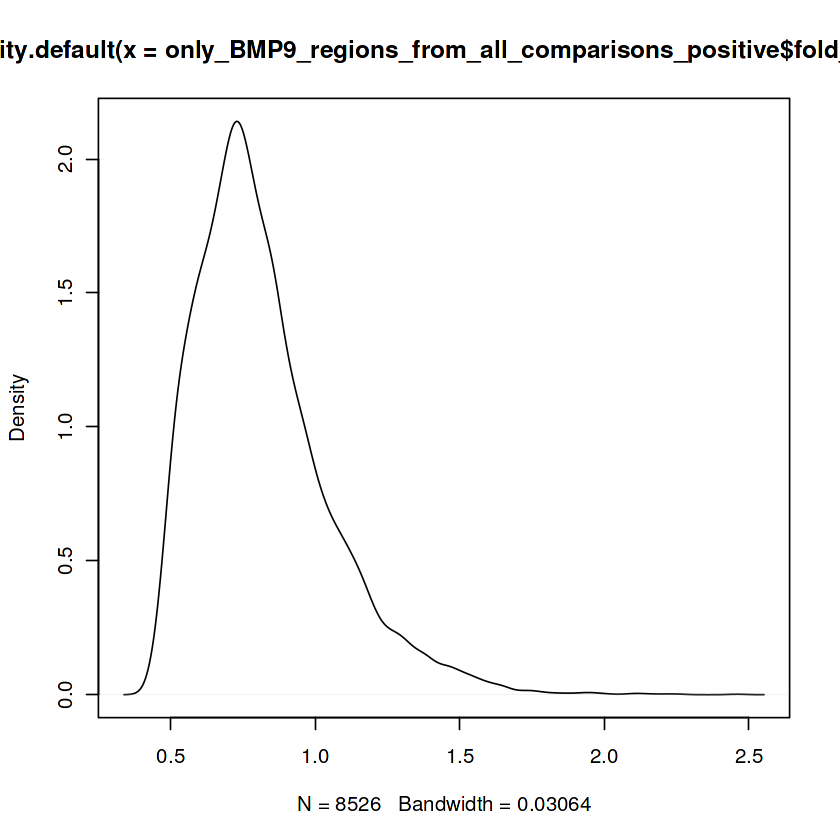

In [53]:
plot(density(only_BMP9_regions_from_all_comparisons_positive$fold_change))

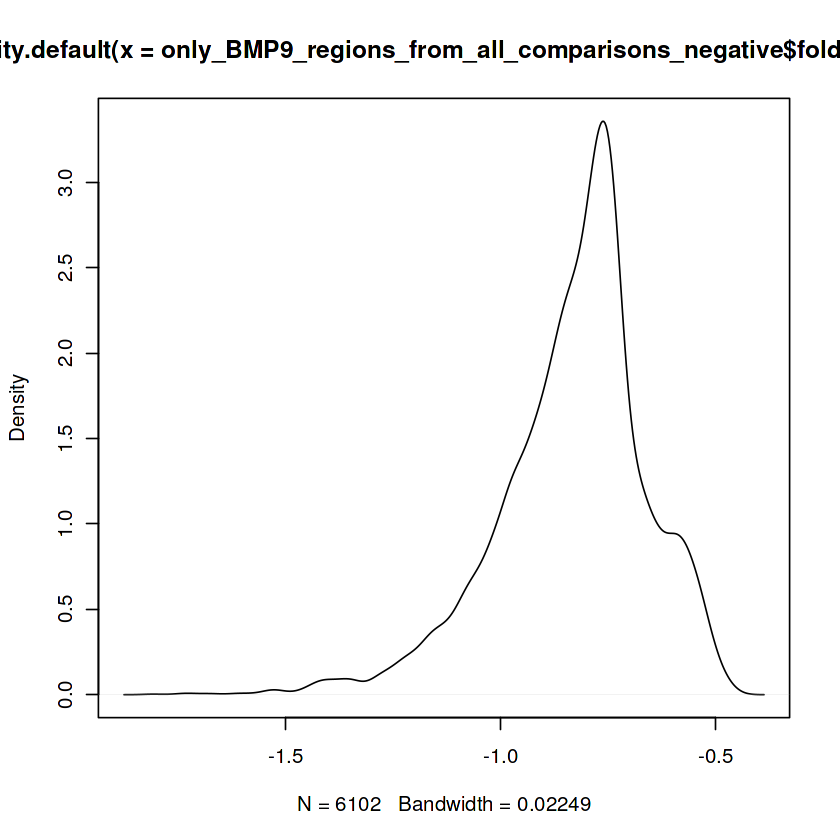

In [54]:
plot(density(only_BMP9_regions_from_all_comparisons_negative$fold_change))

## prepare the outputs for homer

In [70]:
df_to_homer_input <- function(df){
    uniq_peak_ID =  paste(df$seqnames,df$start,df$end,df$gene_symbol, sep="_")
    homer_out = data.frame(chr=df$seqnames,
                       start=df$start,
                       end=df$end,
                       unique_peak_ID=uniq_peak_ID,
                       genes=df$gene_symbol,
                       strand = rep("*",NROW(df))
                      )
    return(homer_out)

}

In [99]:
diff_regions_list = list(flow_cont_VS_stat_cont_FC_less_minus1.5,flow_cont_VS_stat_cont_FC_biger_1.5,flow_cont_VS_stat_cont_FC_biger_0.5,flow_cont_VS_stat_cont_FC_less_minus0.5,flow_cont_VS_stat_cont_FC_negative,flow_cont_VS_stat_cont_FC_positive,stat_bmp9_VS_stat_cont_FC_biger_0.5,stat_bmp9_VS_stat_cont_FC_biger_1.5,stat_bmp9_VS_stat_cont_FC_less_minus0.5,stat_bmp9_VS_stat_cont_FC_less_minus1.5,stat_bmp9_VS_stat_cont_FC_negative,stat_bmp9_VS_stat_cont_FC_positive)



In [100]:
diff_regions_list_names = c('flow_cont_VS_stat_cont_FC_less_minus1.5','flow_cont_VS_stat_cont_FC_biger_1.5','flow_cont_VS_stat_cont_FC_biger_0.5','flow_cont_VS_stat_cont_FC_less_minus0.5','flow_cont_VS_stat_cont_FC_negative','flow_cont_VS_stat_cont_FC_positive','stat_bmp9_VS_stat_cont_FC_biger_0.5','stat_bmp9_VS_stat_cont_FC_biger_1.5','stat_bmp9_VS_stat_cont_FC_less_minus0.5','stat_bmp9_VS_stat_cont_FC_less_minus1.5','stat_bmp9_VS_stat_cont_FC_negative','stat_bmp9_VS_stat_cont_FC_positive')



In [101]:
named_diff_regions_list = list("flow_cont_VS_stat_cont_FC_less_minus1.5"= flow_cont_VS_stat_cont_FC_less_minus1.5,
                               "flow_cont_VS_stat_cont_FC_biger_1.5"= flow_cont_VS_stat_cont_FC_biger_1.5,
                               "flow_cont_VS_stat_cont_FC_biger_0.5"= flow_cont_VS_stat_cont_FC_biger_0.5,
                               "flow_cont_VS_stat_cont_FC_less_minus0.5"= flow_cont_VS_stat_cont_FC_less_minus0.5,
                               "flow_cont_VS_stat_cont_FC_negative"= flow_cont_VS_stat_cont_FC_negative,
                               "flow_cont_VS_stat_cont_FC_positive" = flow_cont_VS_stat_cont_FC_positive,
                               "stat_bmp9_VS_stat_cont_FC_biger_0.5" = stat_bmp9_VS_stat_cont_FC_biger_0.5,
                               "stat_bmp9_VS_stat_cont_FC_biger_1.5" = stat_bmp9_VS_stat_cont_FC_biger_1.5,
                               "stat_bmp9_VS_stat_cont_FC_less_minus0.5" = stat_bmp9_VS_stat_cont_FC_less_minus0.5,
                               "stat_bmp9_VS_stat_cont_FC_less_minus1.5"=stat_bmp9_VS_stat_cont_FC_less_minus1.5,
                               "stat_bmp9_VS_stat_cont_FC_negative"=stat_bmp9_VS_stat_cont_FC_negative,
                               "stat_bmp9_VS_stat_cont_FC_positive"=stat_bmp9_VS_stat_cont_FC_positive)



In [107]:
for (i in seq(1,length(named_diff_regions_list))){
    print(names(named_diff_regions_list[i]))
    df = named_diff_regions_list[[i]]
    print(dim(df))
    homer_out = df_to_homer_input(df)
    print(dim(homer_out))
    file_name = names(named_diff_regions_list[i])
    print(file_name)
    file_out_name = paste("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/",file_name, "_homer.bed",sep=""  )
    write.table(homer_out,file_out_name,quote=F, sep="\t", row.names=F, col.names=F )
}
    

[1] "flow_cont_VS_stat_cont_FC_less_minus1.5"
[1] 1104   17
[1] 1104    6
[1] "flow_cont_VS_stat_cont_FC_less_minus1.5"
[1] "flow_cont_VS_stat_cont_FC_biger_1.5"
[1] 1792   17
[1] 1792    6
[1] "flow_cont_VS_stat_cont_FC_biger_1.5"
[1] "flow_cont_VS_stat_cont_FC_biger_0.5"
[1] 21820    17
[1] 21820     6
[1] "flow_cont_VS_stat_cont_FC_biger_0.5"
[1] "flow_cont_VS_stat_cont_FC_less_minus0.5"
[1] 19458    17
[1] 19458     6
[1] "flow_cont_VS_stat_cont_FC_less_minus0.5"
[1] "flow_cont_VS_stat_cont_FC_negative"
[1] 19546    17
[1] 19546     6
[1] "flow_cont_VS_stat_cont_FC_negative"
[1] "flow_cont_VS_stat_cont_FC_positive"
[1] 21857    17
[1] 21857     6
[1] "flow_cont_VS_stat_cont_FC_positive"
[1] "stat_bmp9_VS_stat_cont_FC_biger_0.5"
[1] 14689    17
[1] 14689     6
[1] "stat_bmp9_VS_stat_cont_FC_biger_0.5"
[1] "stat_bmp9_VS_stat_cont_FC_biger_1.5"
[1] 424  17
[1] 424   6
[1] "stat_bmp9_VS_stat_cont_FC_biger_1.5"
[1] "stat_bmp9_VS_stat_cont_FC_less_minus0.5"
[1] 8089   17
[1] 8089    6
[1

# Generate HOMER commands

In [109]:
for (i in names(named_diff_regions_list)){
    command= paste("findMotifsGenome.pl /project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/", i, "_homer.bed"," gencodev29 /project/Mechanogenomics/ATACseq_analysis/MotifEnrichment/", 
         i, "_homer_size200_len8/ -size 200 -len 8", sep="")
    print(noquote(command))
}

[1] findMotifsGenome.pl /project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/flow_cont_VS_stat_cont_FC_less_minus1.5_homer.bed gencodev29 /project/Mechanogenomics/ATACseq_analysis/MotifEnrichment/flow_cont_VS_stat_cont_FC_less_minus1.5_homer_size200_len8/ -size 200 -len 8
[1] findMotifsGenome.pl /project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/flow_cont_VS_stat_cont_FC_biger_1.5_homer.bed gencodev29 /project/Mechanogenomics/ATACseq_analysis/MotifEnrichment/flow_cont_VS_stat_cont_FC_biger_1.5_homer_size200_len8/ -size 200 -len 8
[1] findMotifsGenome.pl /project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/flow_cont_VS_stat_cont_FC_biger_0.5_homer.bed gencodev29 /project/Mechanogenomics/ATACseq_analysis/MotifEnrichment/flow_cont_VS_stat_cont_FC_biger_0.5_homer_size200_len8/ -size 200 -len 8
[1] findMotifsGenome.pl /project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/HOMER_INPUT_BED/flow_cont_VS_sta